# Predicting Heart Disease Risk Using Machine Learning
**Author:** Navjot Sahota   
**Dataset:** UCI Heart Disease

## Imports


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading, Cleaning & Preprocessing


In [4]:
column_names = ["age","sex","cp","trestbps","chol","fbs","restecg",
                "thalach","exang","oldpeak","slope","ca","thal","target"]

In [5]:
df = pd.read_csv("/content/drive/MyDrive/processed.cleveland.data", names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)
## Target Processing

The original target ranged from 0–4 (severity of heart disease).  
This was converted into a **binary variable**:  
`0` = no disease, `1` = disease present.

A bar plot was created to visualise the class distribution and check for imbalance.

<Axes: xlabel='target'>

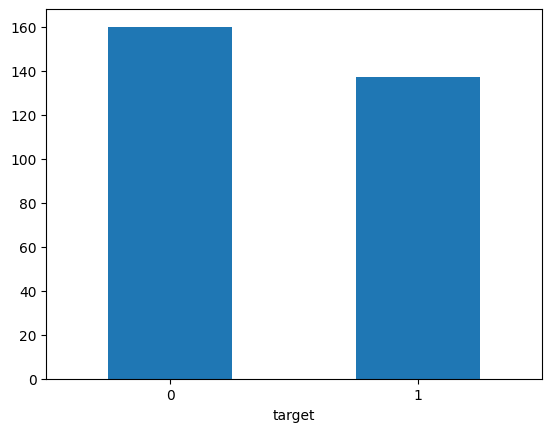

In [13]:
df['target'] = (df['target'] > 0).astype(int)
df['target'].value_counts().plot(kind='bar', rot=0)

The dataset shows a near-balanced class distribution, reducing the risk of biased model predictions.

## Feature Distributions

Histograms were plotted for key numeric features (age, cholesterol, max heart rate) to inspect value ranges, skewness, and potential outliers before modeling.

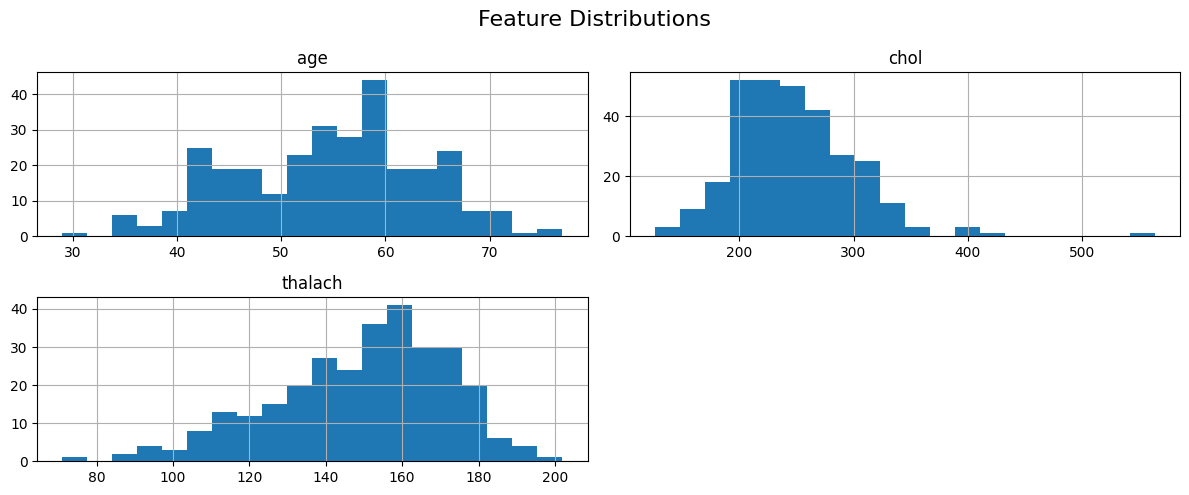

In [14]:
df[['age', 'chol', 'thalach']].hist(figsize=(12,5), bins=20)
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

The feature distributions appear generally realistic with slight right skew in cholesterol and a roughly normal spread for age and max heart rate. No extreme anomalies were observed.


## Correlation Analysis

A correlation heatmap was generated to examine relationships between features and identify potential multicollinearity before modeling.


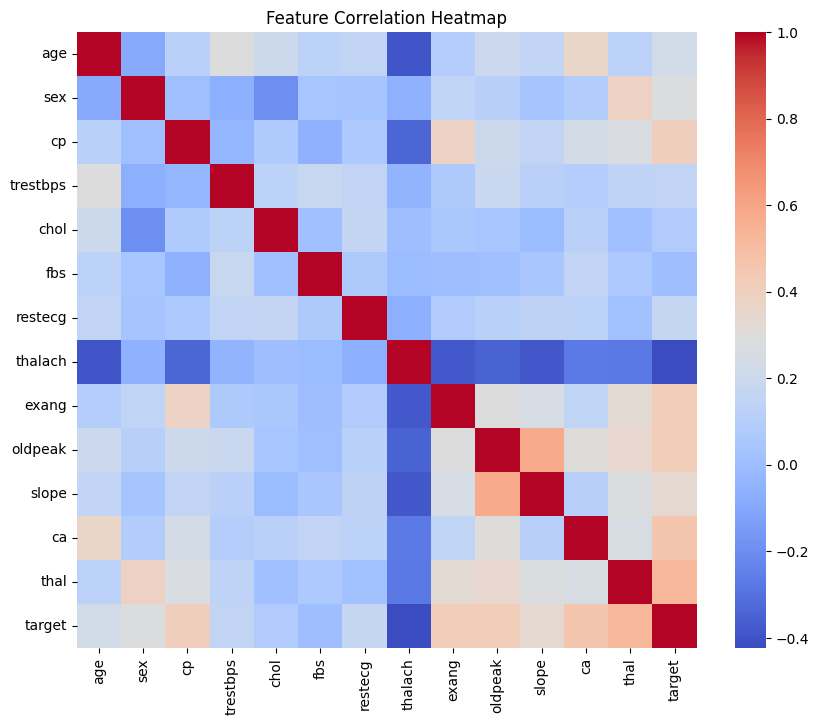

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The correlation heatmap shows moderate relationships between several features and the target variable, with no strong multicollinearity observed between predictors.


## This stage prepares the dataset for modelling, trains multiple machine learning algorithms, and evaluates their predictive performance using standard classification metrics.


In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8833333333333333
Precision: 0.84
Recall: 0.875
ROC-AUC: 0.8819444444444444


The Random Forest model achieved strong performance with balanced precision and recall, indicating reliable detection of heart disease cases and good overall class separation (ROC-AUC ≈ 0.88).


In [23]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))

Accuracy: 0.8666666666666667
Precision: 0.8333333333333334
Recall: 0.8333333333333334
ROC-AUC: 0.8611111111111112


Logistic Regression achieved strong performance with balanced precision and recall, slightly below Random Forest but still demonstrating reliable predictive capability.


In [27]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))

Accuracy: 0.8833333333333333
Precision: 0.8695652173913043
Recall: 0.8333333333333334
ROC-AUC: 0.875


Multiple models achieved strong and comparable performance, with Random Forest and SVM slightly outperforming Logistic Regression, indicating robust predictive patterns in the dataset.


## Model Performance Comparison

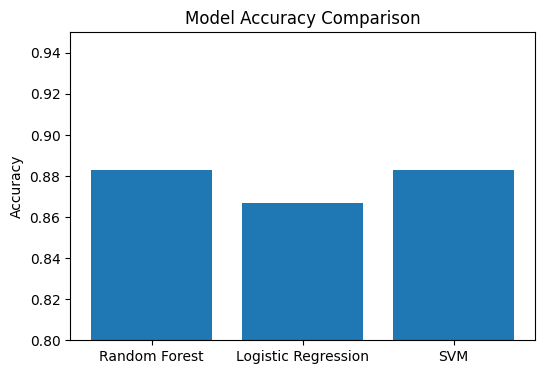

In [29]:
models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [0.883, 0.867, 0.883]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.95)
plt.show()